<a href="https://colab.research.google.com/github/sunmyeonglee/2025-1-NLP/blob/main/3_language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm.auto import tqdm


# Language modeling

In [2]:
!wget "https://raw.githubusercontent.com/karpathy/makemore/master/names.txt"

--2025-05-27 04:51:51--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.003s  

2025-05-27 04:51:51 (68.9 MB/s) - ‘names.txt’ saved [228145/228145]



In [3]:
def read_txt(txt_path):
  with open(txt_path, 'r') as f:
    txt_string = f.readlines()
  return txt_string

txt_string = read_txt('names.txt')

In [4]:
names_list = [x.replace('\n', '') for x in txt_string]
len(names_list)

32033

# N-Gram
- Start with bi-gram (2-gram)

In [5]:
from collections import defaultdict

# bigram_dict = {}
bigram_dict = defaultdict(int) # If key is not in the defaultdict, it automatically assign key and empty value (int=0, list=[])
unigram_dict = defaultdict(int)

# RNN
- $h_t = \tanh(\textbf{W}_{hh}h_{t-1} + \textbf{W}_{xh}x_t + b) $
  - $\textbf{W}$: Weight Matrix
  - $b$: bias
  - $x_t$: input vector of time step $t$
  - $h_t$: hidden state (and also output) of time step $t$


In [6]:
torch.manual_seed(0)
sequence_length = 7
input_dim, hidden_dim = 3, 5
weight_hh = nn.Linear(hidden_dim, hidden_dim)
weight_xh = nn.Linear(input_dim, hidden_dim)
h0 = torch.zeros(hidden_dim)
x = torch.randn([sequence_length, input_dim])
t = 0
x_t = x[t]
x[t]

tensor([ 1.0554,  0.1778, -0.2303])

In [7]:
h_t = torch.tanh(weight_hh(h0) + weight_xh(x_t))
h_t

tensor([-0.3031,  0.4942, -0.3826, -0.1671, -0.0307], grad_fn=<TanhBackward0>)

In [8]:
def run_rnn_cell(weight_hh, weight_xh, prev_h, x_t):
  return torch.tanh(weight_hh(prev_h) + weight_xh(x_t))

output = []
prev_h = h0
for i in range(len(x)):
  print(f'x: {x[i]}')
  h = run_rnn_cell(weight_hh, weight_xh, prev_h, x[i])
  prev_h = h
  print(f'h: {h}')
  output.append(h)

output = torch.stack(output)
output

x: tensor([ 1.0554,  0.1778, -0.2303])
h: tensor([-0.3031,  0.4942, -0.3826, -0.1671, -0.0307], grad_fn=<TanhBackward0>)
x: tensor([-0.3918,  0.5433,  0.3356])
h: tensor([ 0.2949,  0.2907,  0.5566, -0.6004, -0.4537], grad_fn=<TanhBackward0>)
x: tensor([1.5091, 2.0820, 1.7067])
h: tensor([-0.0504, -0.8319,  0.6891, -0.0811, -0.9549], grad_fn=<TanhBackward0>)
x: tensor([ 2.3804, -1.1256, -0.3170])
h: tensor([-0.9035,  0.7153, -0.9110,  0.4101,  0.4610], grad_fn=<TanhBackward0>)
x: tensor([-1.0925,  0.8058,  0.3276])
h: tensor([ 0.5157,  0.1567,  0.7691, -0.8519, -0.4661], grad_fn=<TanhBackward0>)
x: tensor([-0.7607, -1.5991,  0.0185])
h: tensor([-0.6471,  0.9578, -0.5932, -0.2097,  0.4347], grad_fn=<TanhBackward0>)
x: tensor([-0.7504,  0.1854,  0.6211])
h: tensor([ 0.2194,  0.3107,  0.5832, -0.7386, -0.3476], grad_fn=<TanhBackward0>)


tensor([[-0.3031,  0.4942, -0.3826, -0.1671, -0.0307],
        [ 0.2949,  0.2907,  0.5566, -0.6004, -0.4537],
        [-0.0504, -0.8319,  0.6891, -0.0811, -0.9549],
        [-0.9035,  0.7153, -0.9110,  0.4101,  0.4610],
        [ 0.5157,  0.1567,  0.7691, -0.8519, -0.4661],
        [-0.6471,  0.9578, -0.5932, -0.2097,  0.4347],
        [ 0.2194,  0.3107,  0.5832, -0.7386, -0.3476]],
       grad_fn=<StackBackward0>)

In [9]:
names_list[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [10]:
entire_chars = []

for name in names_list:
  for char in name:
    entire_chars.append(char)

len(entire_chars)

196113

In [11]:
set(entire_chars)
vocab = list(set(entire_chars))
vocab.sort()

char2idx = {char: i for i, char in enumerate(vocab)}
char2idx

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

# Define Dataset Class

In [12]:
class NameSet:
  def __init__(self, txt_fn):
    txt_string = read_txt(txt_fn)
    names_list = [x.replace('\n', '') for x in txt_string]
    self.data = names_list

    for name in names_list:
      for char in name:
        entire_chars.append(char)

    self.vocab = list(set(entire_chars))
    self.vocab.sort()

    special_tokens = ['<pad>', '<start>', '<end>']
    self.vocab = special_tokens + self.vocab

    self.char2idx = {char: i for i, char in enumerate(self.vocab)}

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    name_string = self.data[idx]
    name_in_idx = [self.char2idx[char] for char in name_string]
    name_in_idx = [self.char2idx['<start>']] + name_in_idx + [self.char2idx['<end>']]

    model_input = name_in_idx[:-1]
    target_output = name_in_idx[1:]
    return model_input, target_output

dataset = NameSet('names.txt')
dataset.data[0]
len(dataset)
dataset.vocab
dataset[0]

([1, 7, 15, 15, 3], [7, 15, 15, 3, 2])

In [13]:
name = 'emma'

for char in name:
  print(char, char2idx[char])

new = [char2idx[char] for char in name]
new

e 4
m 12
m 12
a 0


[4, 12, 12, 0]

# Define the model

In [50]:
import torch.nn as nn

class LanguageModel(nn.Module):
  def __init__(self, vocab_size, embedding_dim=16):
    super().__init__()
    self.vocab_size = len(dataset.vocab)
    self.emb = nn.Embedding(embedding_dim=embedding_dim, num_embeddings=self.vocab_size)
    self.rnn = nn.GRU(input_size=embedding_dim, hidden_size=2*embedding_dim, num_layers=3)
    self.proj = nn.Linear(in_features=2*embedding_dim, out_features=vocab_size)
    # size랑 feature의 수를 계산하는 것이 중요


  def forward(self, x):
    x = self.emb(x)
    x, last_hidden = self.rnn(x)
    x = self.proj(x)
    x = torch.softmax(x, dim=1)
    return x

vocab_size = len(dataset.vocab)
model = LanguageModel(vocab_size)
model.emb.weight

x, y = dataset[0]
x = torch.tensor(x)
print(x)
print(model(x).shape)
model(x)


tensor([ 1,  7, 15, 15,  3])
torch.Size([5, 29])


tensor([[0.0343, 0.0305, 0.0344, 0.0402, 0.0356, 0.0297, 0.0327, 0.0385, 0.0390,
         0.0312, 0.0371, 0.0318, 0.0292, 0.0401, 0.0384, 0.0348, 0.0347, 0.0388,
         0.0311, 0.0319, 0.0356, 0.0326, 0.0314, 0.0328, 0.0415, 0.0378, 0.0332,
         0.0296, 0.0313],
        [0.0336, 0.0311, 0.0342, 0.0405, 0.0352, 0.0298, 0.0324, 0.0388, 0.0408,
         0.0315, 0.0352, 0.0325, 0.0289, 0.0408, 0.0385, 0.0349, 0.0339, 0.0385,
         0.0315, 0.0321, 0.0362, 0.0326, 0.0308, 0.0325, 0.0413, 0.0390, 0.0325,
         0.0288, 0.0313],
        [0.0335, 0.0318, 0.0341, 0.0406, 0.0350, 0.0301, 0.0326, 0.0391, 0.0418,
         0.0313, 0.0339, 0.0325, 0.0288, 0.0412, 0.0386, 0.0347, 0.0333, 0.0384,
         0.0315, 0.0323, 0.0367, 0.0328, 0.0301, 0.0323, 0.0411, 0.0401, 0.0324,
         0.0281, 0.0311],
        [0.0337, 0.0323, 0.0339, 0.0407, 0.0351, 0.0305, 0.0329, 0.0394, 0.0426,
         0.0310, 0.0330, 0.0323, 0.0286, 0.0415, 0.0386, 0.0344, 0.0326, 0.0381,
         0.0313, 0.0325, 0.0370

# Define Collate Function



In [16]:
from torch.utils.data import DataLoader

def collate(raw_batch):
  x = [ item[0] for item in raw_batch ]
  y = [ item[1] for item in raw_batch ]
  length_name = max([ len(name) for name in x ])
  num_pad = [ length_name - len(name) for name in x]
  # num_pad = []
  # for name in x:
  #   num_pad.append(length_name - len(name))

  pad_x = []
  pad_y = []

  for name, name_y, pad in zip(x, y, num_pad):
    # print(name, name_y, pad)
    paded_name = name + [0] * pad
    paded_name_y = name_y + [0] * pad
    pad_x.append(paded_name)
    pad_y.append(paded_name_y)

  # pad_x = torch.zeros(len(raw_batch), length_name, dtype=torch.long)
  # for i, name in enumerate(x):
  #   pad_x[i, :len(name)] = torch.tensor(name)

  x = pad_x
  y = pad_y
  # print(length_name)

  return torch.tensor(x), torch.tensor(y)

dataloader = DataLoader(dataset, batch_size=8, collate_fn=collate)

for batch in dataloader:
  print(batch)
  break


(tensor([[ 1,  7, 15, 15,  3,  0,  0,  0,  0,  0],
        [ 1, 17, 14, 11, 24, 11,  3,  0,  0,  0],
        [ 1,  3, 24,  3,  0,  0,  0,  0,  0,  0],
        [ 1, 11, 21,  3,  4,  7, 14, 14,  3,  0],
        [ 1, 21, 17, 18, 10, 11,  3,  0,  0,  0],
        [ 1,  5, 10,  3, 20, 14, 17, 22, 22,  7],
        [ 1, 15, 11,  3,  0,  0,  0,  0,  0,  0],
        [ 1,  3, 15,  7, 14, 11,  3,  0,  0,  0]]), tensor([[ 7, 15, 15,  3,  2,  0,  0,  0,  0,  0],
        [17, 14, 11, 24, 11,  3,  2,  0,  0,  0],
        [ 3, 24,  3,  2,  0,  0,  0,  0,  0,  0],
        [11, 21,  3,  4,  7, 14, 14,  3,  2,  0],
        [21, 17, 18, 10, 11,  3,  2,  0,  0,  0],
        [ 5, 10,  3, 20, 14, 17, 22, 22,  7,  2],
        [15, 11,  3,  2,  0,  0,  0,  0,  0,  0],
        [ 3, 15,  7, 14, 11,  3,  2,  0,  0,  0]]))


In [17]:
dataset[4]

([1, 21, 17, 18, 10, 11, 3], [21, 17, 18, 10, 11, 3, 2])

# Define the split function

In [18]:
train_size = int(len(dataset) * 0.9)
val_size = len(dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define Training Loop

In [15]:
x, y = dataset[0]
x = torch.tensor(x)
y = torch.tensor(y)
prediction = model(x)
print(y)
prediction

prob_of_correct_char = prediction[torch.arange(len(y)), y]
prob_of_correct_char
nll = -torch.log(prob_of_correct_char)
nll.mean()

tensor([ 7, 15, 15,  3,  2])


tensor(3.4748, grad_fn=<MeanBackward0>)

In [19]:
train_loader = DataLoader(train_dataset, batch_size=8, collate_fn=collate, shuffle=True)
batch = next(iter(train_loader))
x,y = batch
prediction = model(x)
batch_size, seq_length, vocab_size = prediction.shape # batch_size, seq_length, vocab_size
prediction = prediction.reshape(batch_size * seq_length, vocab_size)
y = y.reshape(-1)
print(prediction.shape, y.shape)
prob_of_correct_char = prediction[torch.arange(len(y)), y]

torch.Size([80, 29]) torch.Size([80])


In [20]:
x

tensor([[ 1, 21, 10, 20,  7, 27,  3, 16, 21, 10],
        [ 1,  5, 10, 20, 11, 21, 22, 11,  7,  0],
        [ 1, 22, 27, 14, 17, 20,  0,  0,  0,  0],
        [ 1,  5, 10,  3, 20, 14, 21, 11,  7,  0],
        [ 1, 21, 10, 27,  3, 16,  0,  0,  0,  0],
        [ 1, 13,  7, 11, 20,  3,  0,  0,  0,  0],
        [ 1, 21, 10,  3, 19, 23, 11, 14, 14,  7],
        [ 1,  6,  3, 11, 28, 27,  0,  0,  0,  0]])

In [22]:
y

tensor([21, 10, 20,  7, 27,  3, 16, 21, 10,  2,  5, 10, 20, 11, 21, 22, 11,  7,
         2,  0, 22, 27, 14, 17, 20,  2,  0,  0,  0,  0,  5, 10,  3, 20, 14, 21,
        11,  7,  2,  0, 21, 10, 27,  3, 16,  2,  0,  0,  0,  0, 13,  7, 11, 20,
         3,  2,  0,  0,  0,  0, 21, 10,  3, 19, 23, 11, 14, 14,  7,  2,  6,  3,
        11, 28, 27,  2,  0,  0,  0,  0])

In [23]:
prob_of_correct_char.shape

torch.Size([80])

In [36]:
new_prob = []
for i in range(len(y)):
  if y[i] == 0:
    continue
  new_prob.append(prob_of_correct_char[i])
new_prob = torch.stack(new_prob)
new_prob

tensor([0.1054, 0.1083, 0.0875, 0.0785, 0.1017, 0.1218, 0.0864, 0.0972, 0.1083,
        0.0951, 0.1067, 0.1151, 0.0819, 0.1168, 0.0939, 0.0982, 0.1100, 0.0997,
        0.1277, 0.1109, 0.1136, 0.0933, 0.0996, 0.0993, 0.1067, 0.1102, 0.1101,
        0.1206, 0.1148, 0.1102, 0.0838, 0.0947, 0.0986, 0.1296, 0.1069, 0.1200,
        0.0701, 0.1191, 0.0794, 0.0936, 0.1166, 0.0946, 0.0982, 0.0997, 0.1127,
        0.0854, 0.1097, 0.1163, 0.1033, 0.1171, 0.0967, 0.0984, 0.0977, 0.0890,
        0.1043, 0.1195, 0.1058, 0.0848, 0.1081, 0.1053, 0.1092, 0.0913],
       grad_fn=<StackBackward0>)

In [39]:
# list comprehension
new_prob = [ prob_of_correct_char[i] for i in range(len(y)) if y[i] != 0 ]
new_prob = torch.stack(new_prob)
new_prob

tensor([0.1054, 0.1083, 0.0875, 0.0785, 0.1017, 0.1218, 0.0864, 0.0972, 0.1083,
        0.0951, 0.1067, 0.1151, 0.0819, 0.1168, 0.0939, 0.0982, 0.1100, 0.0997,
        0.1277, 0.1109, 0.1136, 0.0933, 0.0996, 0.0993, 0.1067, 0.1102, 0.1101,
        0.1206, 0.1148, 0.1102, 0.0838, 0.0947, 0.0986, 0.1296, 0.1069, 0.1200,
        0.0701, 0.1191, 0.0794, 0.0936, 0.1166, 0.0946, 0.0982, 0.0997, 0.1127,
        0.0854, 0.1097, 0.1163, 0.1033, 0.1171, 0.0967, 0.0984, 0.0977, 0.0890,
        0.1043, 0.1195, 0.1058, 0.0848, 0.1081, 0.1053, 0.1092, 0.0913],
       grad_fn=<StackBackward0>)

In [41]:
# much more simple way
y!=0
prob_of_correct_char[y!=0]

tensor([0.1054, 0.1083, 0.0875, 0.0785, 0.1017, 0.1218, 0.0864, 0.0972, 0.1083,
        0.0951, 0.1067, 0.1151, 0.0819, 0.1168, 0.0939, 0.0982, 0.1100, 0.0997,
        0.1277, 0.1109, 0.1136, 0.0933, 0.0996, 0.0993, 0.1067, 0.1102, 0.1101,
        0.1206, 0.1148, 0.1102, 0.0838, 0.0947, 0.0986, 0.1296, 0.1069, 0.1200,
        0.0701, 0.1191, 0.0794, 0.0936, 0.1166, 0.0946, 0.0982, 0.0997, 0.1127,
        0.0854, 0.1097, 0.1163, 0.1033, 0.1171, 0.0967, 0.0984, 0.0977, 0.0890,
        0.1043, 0.1195, 0.1058, 0.0848, 0.1081, 0.1053, 0.1092, 0.0913],
       grad_fn=<IndexBackward0>)

In [43]:
prediction = model(x)

def get_loss(prediction, y):
  batch_size, seq_length, vocab_size = prediction.shape # batch_size, seq_length, vocab_size
  prediction = prediction.reshape(batch_size * seq_length, vocab_size)
  y = y.reshape(-1)
  prob_of_correct_char = prediction[torch.arange(len(y)), y]
  prob_of_correct_char = prob_of_correct_char[y!=0]
  nll = -torch.log(prob_of_correct_char + 1e-8)
  return nll.mean()

get_loss(prediction, y)

tensor(2.2803, grad_fn=<MeanBackward0>)

In [51]:
from tqdm.auto import tqdm

device = 'cuda'
model = LanguageModel(vocab_size, embedding_dim=32).to(device)
optimizer = torch.optim.Adam(model.parameters())
train_loader = DataLoader(train_dataset, batch_size=64, collate_fn=collate, shuffle=True)

loss_record = []
n_epoch = 10

for i in range(n_epoch):
  for batch in tqdm(train_loader, leave=False):
    x, y = batch
    pred = model(x.to(device))
    loss = get_loss(pred, y.to(device))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_record.append(loss.item())

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

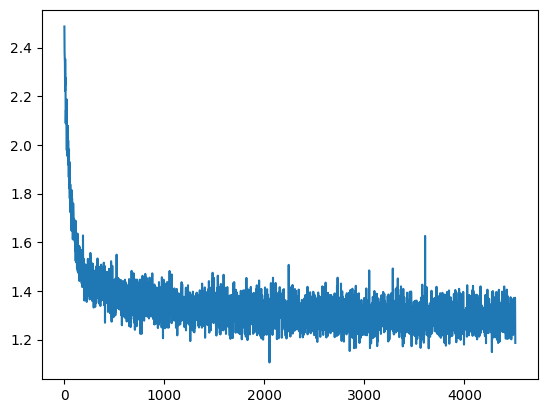

In [52]:
import matplotlib.pyplot as plt
plt.plot(loss_record)

# Define the Inference

Unlike the training, we don't have the target output in the inference
We need to feed the model with the previous character and get the next character as the output
We have to "sample" the next character from the model.
For this, we can use the torch.multinomial function
torch.multinomial(logits, num_samples=1)
This function will sample the next character from the logits
We can use this function to sample the next character in the inference loop

In [65]:
torch.set_printoptions(sci_mode=False)
model.to('cpu')
model.eval()

in_token = [1, 4]
last_hidden = None

for i in range(20):
  x = torch.tensor(in_token[-1:]).unsqueeze(0)
  token_embeded = model.emb(x)
  rnn_out, last_hidden = model.rnn(token_embeded)
  logit = model.proj(rnn_out)
  prob = logit.softmax(dim=-1)[:, -1]
  sampled_token = torch.multinomial(prob, num_samples=1)
  if sampled_token.item() in [0,1,2]: break
  in_token.append(sampled_token.item())

''.join([dataset.vocab[token] for token in in_token[1:]])

'bwquxquxaviqdixfzexy'